# Docs and relevent frameworks

https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/

https://github.com/facebookresearch/detectron2

# 3D MRI Scans Inputs

We load flair, t1ce, t2 and define any pre-processing methods here. Without preprocessing, the training data has size `(3, 240, 240, 155)` and the target has size `(240, 240, 155)`.

In [ ]:
class BraTSDataset(Dataset):
    def __init__(self, image_path = r'./BraTS/BraTS2021_Training_Data', transform=None):
        'Initialisation'
        self.image_path = image_path
        self.folders_name = [folder for folder in os.listdir(self.image_path) if folder != '.DS_Store']
        self.transform = transform

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.folders_name)

    def __getitem__(self, index):
        'Generates one sample of data'

        # Select sample
        fld_name = self.folders_name[index]
        image = []
        for scan_type in ['flair', 't1ce', 't2']:
            path_img = os.path.join(self.image_path, fld_name, fld_name + '_' + scan_type + '.nii.gz')
            img = nib.load(path_img).get_fdata()
            image.append(img)
        
        image = np.array(image)

        path_label = os.path.join(self.image_path, fld_name, fld_name + '_seg.nii.gz')

        label = nib.load(path_label).get_fdata()
        if self.transform:
            image, label = self.transform([image, label])
        return image, label

# Some scan examples

In [5]:
import os, numpy as np, nibabel as nib
import matplotlib.pylab as plt

## Load an image

In [88]:
main_path = r'./BraTS/BraTS2021_Training_Data'
scan_number = '00000'
scan_type =  'flair' # = ['flair', 't1ce', 't2']
ext = 'nii.gz'
slice = int(155/2)

In [89]:
path_img = os.path.join(main_path, f'BraTS2021_{scan_number}', f'BraTS2021_{scan_number}_{scan_type}.{ext}')
img = nib.load(path_img).get_fdata()

In [90]:
path_seg = os.path.join(main_path, f'BraTS2021_{scan_number}', f'BraTS2021_{scan_number}_seg.{ext}')
img_seg = nib.load(path_seg).get_fdata()

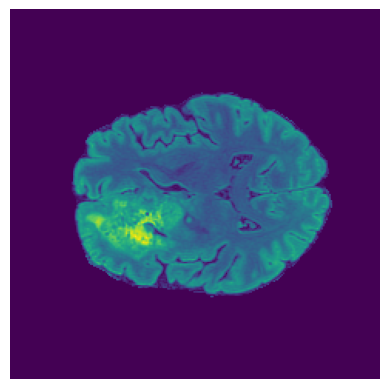

In [91]:
plt.imshow(img[:,:,slice])
plt.axis('off')
plt.show()

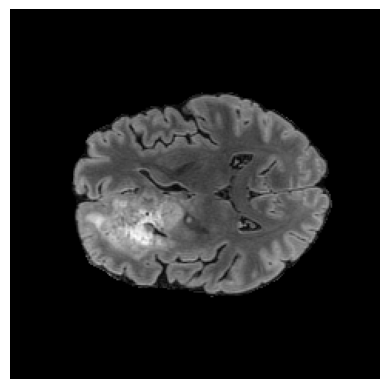

In [92]:
plt.imshow(img[:,:,slice], cmap='gray')
plt.axis('off')
plt.show()

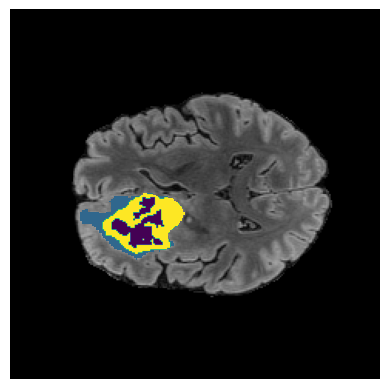

In [74]:
plt.imshow(img[:,:,slice], cmap='gray')
masked = np.ma.masked_where(img_seg[:,:,slice] == 0, img_seg[:,:,slice])
plt.imshow(masked, alpha = 1)
plt.axis('off')
plt.show()

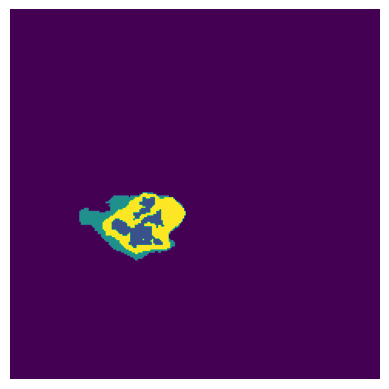

In [72]:
plt.imshow(img_seg[:,:,slice])
plt.axis('off')
plt.show()

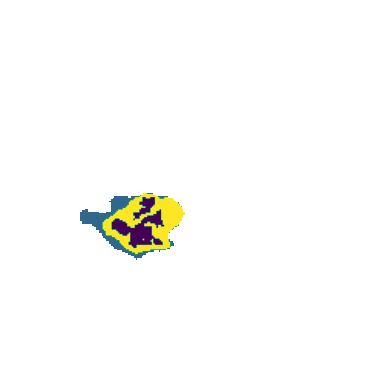

In [73]:
plt.imshow(masked)
plt.axis('off')
plt.show()

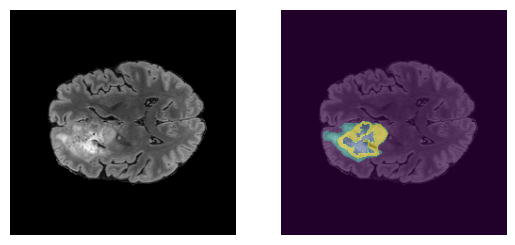

In [66]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img[:,:,slice], cmap='gray')
ax[0].axis('off')
ax[1].imshow(img[:,:,slice], cmap='gray')
ax[1].imshow(img_seg[:,:,slice], alpha=0.5)
ax[1].axis('off')
plt.show()

## Load another image

In [76]:
main_path = r'./BraTS/BraTS2021_Training_Data'
scan_number = '00625'
scan_type =  'flair' # = ['flair', 't1ce', 't2']
ext = 'nii.gz'
slice = int(155/2)

In [77]:
path_img = os.path.join(main_path, f'BraTS2021_{scan_number}', f'BraTS2021_{scan_number}_{scan_type}.{ext}')
img = nib.load(path_img).get_fdata()

In [78]:
path_seg = os.path.join(main_path, f'BraTS2021_{scan_number}', f'BraTS2021_{scan_number}_seg.{ext}')
img_seg = nib.load(path_seg).get_fdata()

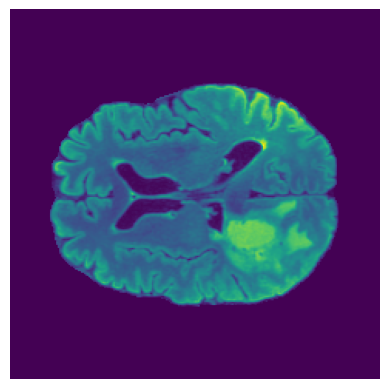

In [79]:
plt.imshow(img[:,:,slice])
plt.axis('off')
plt.show()

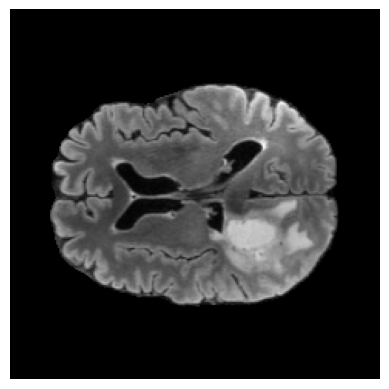

In [84]:
plt.imshow(img[:,:,slice], cmap='gray')
plt.axis('off')
plt.show()

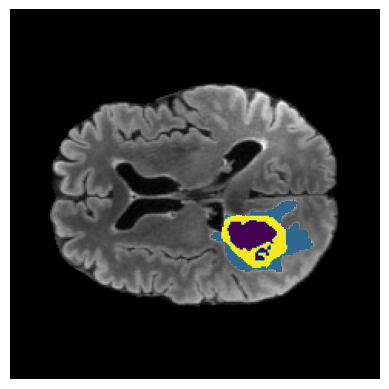

In [80]:
plt.imshow(img[:,:,slice], cmap='gray')
masked = np.ma.masked_where(img_seg[:,:,slice] == 0, img_seg[:,:,slice])
plt.imshow(masked, alpha = 1)
plt.axis('off')
plt.show()

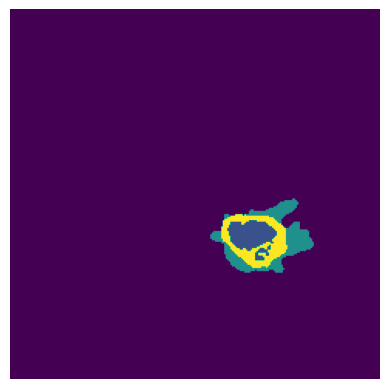

In [81]:
plt.imshow(img_seg[:,:,slice])
plt.axis('off')
plt.show()

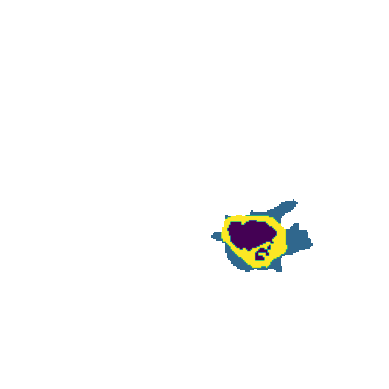

In [82]:
plt.imshow(masked)
plt.axis('off')
plt.show()

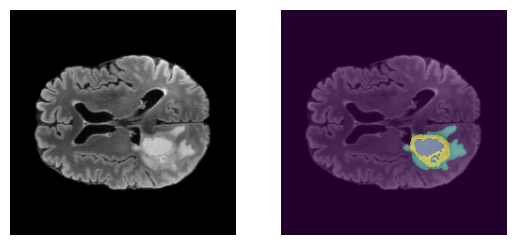

In [83]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img[:,:,slice], cmap='gray')
ax[0].axis('off')
ax[1].imshow(img[:,:,slice], cmap='gray')
ax[1].imshow(img_seg[:,:,slice], alpha=0.5)
ax[1].axis('off')
plt.show()